# Práctica 6 (Simulación, segunda parte)

## 1. 
Tenemos un sistema para producir contraseñas. Este sistema genera contraseñas formadas por 4
letras distintas seguidos de 3 números. Sabiendo que hay 26 letras y no se distinguen minúsculas
de mayúsculas, se pide:

* Si cojo una contraseña, nos interesa A = "tener exactamente dos vocales". Calcula P(A).
* Haz un programa que haga una contraseña con este sistema.
*  Ejecuta el programa 10000 veces y comprueba con los datos obtenidos si las frecuencias
correspondientes se parecen a la probabilidad calculada en el primer apartado


Tenemos dos sistemas para generar números. El primero genera números de 6 dígitos mientras que el segundo los genera de 7 dígitos. Usamos el primer sistema el 30\% de las veces y el segundo sistema en el resto de los casos. Se pide:
* Si cojo un número, nos interesa A = "tener todos los dígitos distintos". Calcula P(A).
* Haz un programa que escoja un sistema y genere un número con el sistema elegido.
* Ejecuta el programa 10000 veces y comprueba con los datos obtenidos si las frecuencias
correspondientes se parecen a las probabilidades calculadas en el primer apartado. (Deben compararse tanto $P(A)$ como $P(S_1)$ y $P(S_2)$ con los datos generados, por lo que conviene crear dos variables: una variable llamada ``S'' y otra llamada ``A". Para cada repetición del experimento aleatorio, la variable ``S'' nos informa del sistema elegido y la variables ``A'' nos dice si se ha producido o no el suceso $A$)
* Calcula $P(A|S1)$ y comprueba el resultado usando el programa usado
* Calcula $P(S1|A)$ y comprueba el resultado usando el programa usado 



## 2.
Se lanzan 5 dados, cada uno de ellos con 6 caras numeradas del 1 al 6. Se sabe que los dados no están trucados, es decir que la probabilidad de cada resultado es 1/6 (en cada dado). Los posibles resultados de una tirada y sus probabilidades son:

*  Dis = los 5 resultados distintos, $P(Dis) = \frac{6\cdot 5\cdot 4\cdot 3\cdot 2}{6^5}= 0.0925925926$
*  Par = un resultado sale dos veces y los otros tres son distintos , $P(Par) =\frac{{5\choose{5}}\cdot 6\cdot 5\cdot 4\cdot 3}{6^5}=0.4629629630$
* DPar = dos resultados se repiten dos veces cada uno y el otro es distinto , $P(DPar)=\frac{{5\choose{2}}\cdot 6\cdot {3\choose{2}\cdot 5 \cdot 4}}{2\cdot 6^5}=0.2314814815$
* Trio = Un resultado se repite tres veces y los otros dos son distintos , $P(Trio) = \frac{{5\choose{3}}\cdot 6\cdot 5\cdot 4}{6^5}=0.1543209877$
* Ful = Un resultado se repite tres veces y otro se repite dos veces, $P(Ful) = \frac{{6\choose{3}}\cdot 6\cdot 5}{6^5}=0.0385802469$
* Pok = Un resultado se repite 4 veces y el otro es distinto, $P(Pok)=\frac{{5\choose{4}}\cdot 6\cdot 5}{6^5}=0.0192901235$
* RPok = Un resultado se repite 5 veces, $P(RPok) = \frac{6}{6^5}= 0.0007716049$

* Haz un programa que simule el lanzamiento de 5 dados. Para cada lanzamiento, almacena los 5
resultados en una variable llamada tirada. Para esa tirada, calcula su tabla, la longitud de la tabla y su
máximo. En función de ellas indica qué tipo de tirada ha sido (por ejemplo, si la longitud de la tabla es
5, debe ser con resultados distintos...)

* Introduce 7 variables para contar cuántas veces se repite cada tipo de tirada. Repite el procedimiento
1000 veces para calcular las frecuencias absolutas y relativas con las que se da cada tipo de partida y
comprueba si las frecuencias relativas se parecen a las teóricas proporcionadas
* Repite el proceso con un dado trucado en el que la probabilidad de 1 y 2 sea 1/3 cada uno y las
probabilidades de los demás resultados sean iguales entre sí
* <font color='red'> Para un tipo de partida (por ejemplo Pok) crea una variable llamada frecuencias. Repite el experimento
del apartado anterior 40 veces y almacena las frecuencias en una variable. Estudia dicha variable.</font>


## 1. Generación de contraseñas

### 1.a - Probabilidad de tener exactamente dos vocales

In [1]:

from scipy.special import comb, factorial

P = (comb(4,2)*5*4*21*20)/(factorial(26)/factorial(22))
P


0.14046822742474915

### 1.b - Generador de contraseñas

In [2]:

import random
import string

def generar_contraseña():
    letras = list(string.ascii_lowercase)
    digitos = list(range(10))
    L = random.sample(letras, 4)
    D = [random.choice(digitos) for _ in range(3)]
    return L + D

generar_contraseña()


['i', 'g', 'r', 's', 9, 1, 0]

### 1.c - Simulación de 10,000 contraseñas

In [3]:

vocales = {'a', 'e', 'i', 'o', 'u'}
resultados = []

for _ in range(10000):
    L = random.sample(string.ascii_lowercase, 4)
    D = [random.choice(range(10)) for _ in range(3)]
    num_vocales = sum(1 for letra in L if letra in vocales)
    resultados.append(num_vocales == 2)

sum(resultados) / len(resultados)


0.139

# Ejercicio 2: Dos sistemas de generación de números


## 2.a) Probabilidad de tener todos los dígitos distintos

In [4]:
# %%
P_A_S1 = (10*9*8*7*6*5) / 10**6
P_A_S2 = (10*9*8*7*6*5*4) / 10**7
P_A = P_A_S1 * 0.3 + P_A_S2 * 0.7
P_S1_A = (P_A_S1 * 0.3) / P_A

P_A, P_A_S1, P_S1_A



(0.087696, 0.1512, 0.5172413793103449)

### 2.b, 2.c, 2.d, 2.e) Simulación del proceso 10,000 veces y estimaciones

In [16]:
S = []  # sistema elegido
A = []  # si tiene todos los dígitos distintos
digitos=[0,1,2,3,4,5,6,7,8,9]

for _ in range(10000):
    sistema = random.choices([1, 2], weights=[0.3, 0.7])[0]
    S.append(sistema)
    n_digitos = 6 if sistema == 1 else 7
    numero = random.choices(digitos, k=n_digitos)
    A.append(len(set(numero)) == len(numero))

import pandas as pd
import numpy as np

df = pd.DataFrame({'S': S, 'A': A})
df

,S,A
0,1,False
1,2,False
2,2,False
3,2,False
4,2,False
...,...,...
9995,2,False
9996,2,False
9997,2,False
9998,1,False


In [17]:

# Frecuencia conjunta
freq = pd.crosstab(df['A'], df['S'])
freq

S,1,2
A,,
False,2495,6635
True,422,448


In [18]:
# Probabilidades condicionales
cond_filas = freq.div(freq.sum(axis=1), axis=0)
print(cond_filas)

S             1         2
A                        
False  0.273275  0.726725
True   0.485057  0.514943


In [19]:
cond_columnas = freq.div(freq.sum(axis=0), axis=1)
print(cond_columnas)

S             1        2
A                       
False  0.855331  0.93675
True   0.144669  0.06325


In [20]:
# Comparaciones con los valores teóricos
cond_filas.loc[True, 1], P_S1_A 

(0.4850574712643678, 0.5172413793103449)

In [21]:
cond_columnas.loc[True, 1], P_A_S1

(0.14466918066506684, 0.1512)

# Ejercicio 3: Simulación de lanzamientos de 5 dados

### 3.a) Clasificación de tipo de tirada según la tabla de frecuencias

In [8]:

import pandas as pd
import numpy as np

In [9]:
def tipo_tirada(tirada):
    valores = pd.Series(tirada).value_counts()
    long = len(valores)
    maxi = valores.max()
    mini = valores.min()
    if long == 5:
        return "Dist"
    elif long == 4:
        return "Par"
    elif long == 3 and maxi == 2:
        return "DPar"
    elif long == 3 and maxi == 3:
        return "Trio"
    elif long == 2 and mini == 2:
        return "Ful"
    elif long == 2 and mini == 1:
        return "Pok"
    elif long == 1:
        return "RPok"

In [10]:
# Ejemplo:
for _ in range(10):
    t = random.choices(range(1,7), k=5)
    print(t, tipo_tirada(t))

[4, 2, 4, 1, 4] Trio
[6, 2, 4, 4, 1] Par
[6, 4, 5, 6, 6] Trio
[2, 6, 2, 1, 6] DPar
[2, 2, 4, 4, 2] Ful
[2, 3, 3, 6, 1] Par
[3, 3, 4, 6, 6] DPar
[1, 4, 1, 2, 1] Trio
[6, 3, 4, 3, 3] Trio
[6, 3, 4, 5, 4] Par


 ### 3.b) Frecuencias relativas de cada tipo de tirada (1000 repeticiones)

In [11]:
from collections import Counter

tipos = []

for _ in range(1000):
    t = random.choices(range(1,7), k=5)
    tipos.append(tipo_tirada(t))

contador = Counter(tipos)
total = sum(contador.values())
frecuencias_relativas = {k: v/total for k, v in contador.items()}
contador

Counter({'Par': 495,
         'Trio': 126,
         'Ful': 41,
         'DPar': 237,
         'Dist': 91,
         'Pok': 10})

In [12]:
frecuencias_relativas

{'Par': 0.495,
 'Trio': 0.126,
 'Ful': 0.041,
 'DPar': 0.237,
 'Dist': 0.091,
 'Pok': 0.01}

### 3.c) Repetición con dado trucado (1 y 2 con probabilidad 1/3, el resto igual entre sí)

In [13]:
prob_trucado = [1/3, 1/3] + [(1 - 2/3)/4]*4  # para valores 1 al 6
valores = [1,2,3,4,5,6]

tipos_trucado = []

for _ in range(1000):
    t = random.choices(valores, weights=prob_trucado, k=5)
    tipos_trucado.append(tipo_tirada(t))

contador_trucado = Counter(tipos_trucado)
frecuencias_relativas_trucado = {k: v/1000 for k, v in contador_trucado.items()}
contador_trucado

Counter({'Trio': 245,
         'Par': 311,
         'Pok': 81,
         'Dist': 28,
         'Ful': 96,
         'DPar': 236,
         'RPok': 3})

In [14]:
frecuencias_relativas_trucado

{'Trio': 0.245,
 'Par': 0.311,
 'Pok': 0.081,
 'Dist': 0.028,
 'Ful': 0.096,
 'DPar': 0.236,
 'RPok': 0.003}

### 3.d) Estudio de la variable "frecuencias" para tipo Pok, repitiendo el experimento 40 veces

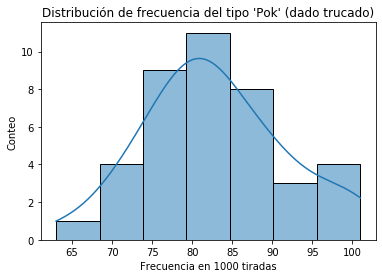

(82.8, 8.70976463516667)

In [15]:
frecuencias_pok = []

for _ in range(40):
    pok_count = 0
    for _ in range(1000):
        t = random.choices(valores, weights=prob_trucado, k=5)
        if tipo_tirada(t) == "Pok":
            pok_count += 1
    frecuencias_pok.append(pok_count)

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(frecuencias_pok, kde=True)
plt.title("Distribución de frecuencia del tipo 'Pok' (dado trucado)")
plt.xlabel("Frecuencia en 1000 tiradas")
plt.ylabel("Conteo")
plt.show()

np.mean(frecuencias_pok), np.std(frecuencias_pok)